In [ ]:
# Origin: ProgCourse - week 2 homework
# Author: Augustin Dao
# Last modified: 20/09/2016

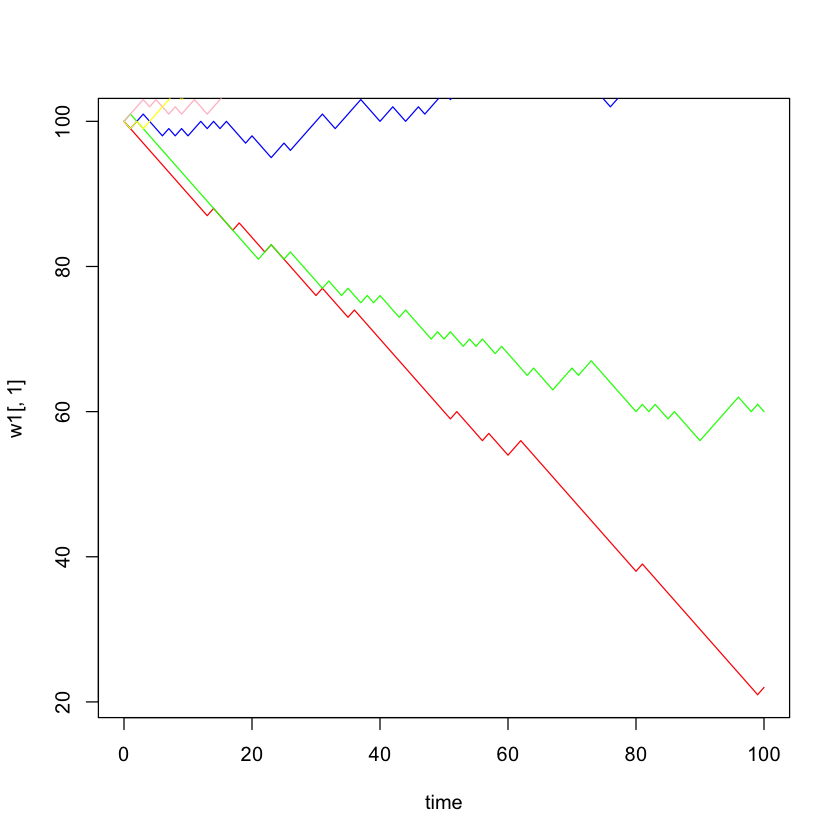

In [47]:
# 1. Loop over different values of p 

w0 <- 100 #initial wealth
T <- 100 #final time period
N <- 5 #number of probabilities

#vector containing different win probabilities
p <- c(0.1,0.3,0.5,0.7,0.9)

#create empty objects to track wealth and wins
w1 <- rep(0, T + 1)
x1 <- rep(0, T)
w1 <- matrix(rep(w1,N), nrow=T+1, ncol=N) #record wealth - by T across rows & prob. across col.x
x1 <- matrix(rep(x1,N), nrow=T, ncol=N )

#fill initial wealth in matrix
for(n in 1:N){
  w1[1,n] <- w0   
}

for(n in 1:N){ #loop over five arbitrary win probabilities
    
    for(i in 1:T){
      #random draw
        u <- runif(1)
      if(u <= 1-p[n]){
        x1[i] <- 0
        w1[i+1,n] <- w1[i,n] - 1
      } else {
        x1[i] <- 1
        w1[i+1,n] <- w1[i,n] + 1
      }
    }
}

time = 0:T
plot(time, w1[,1],type='l',col="red")
lines(time, w1[,2],type='l',col="green")
lines(time, w1[,3],type='l',col="blue")
lines(time, w1[,4],type='l',col="pink")
lines(time, w1[,5],type='l',col="yellow")

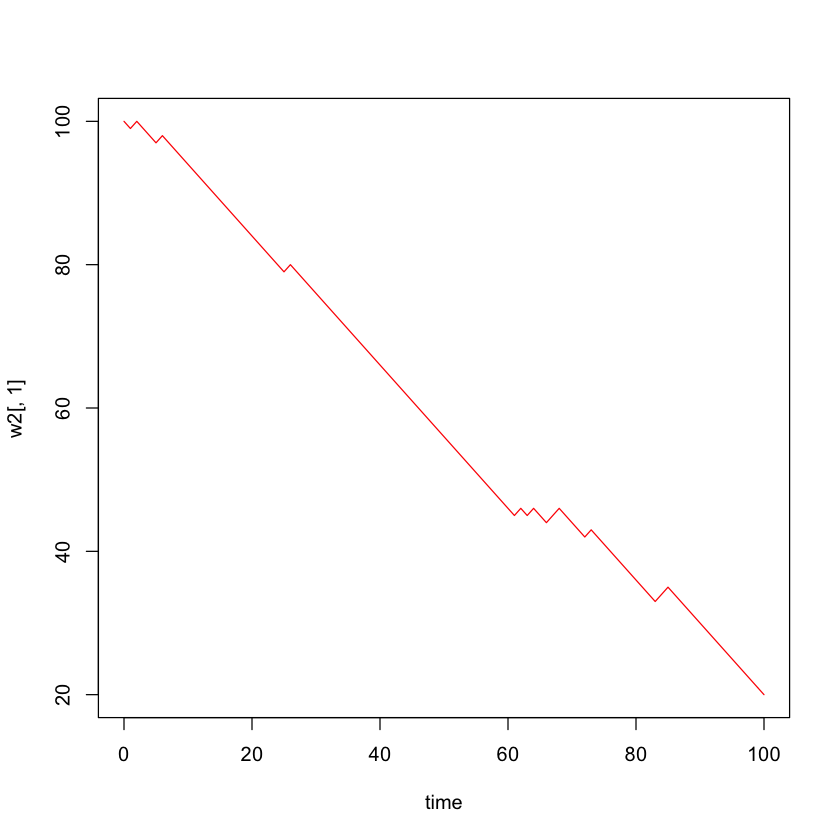

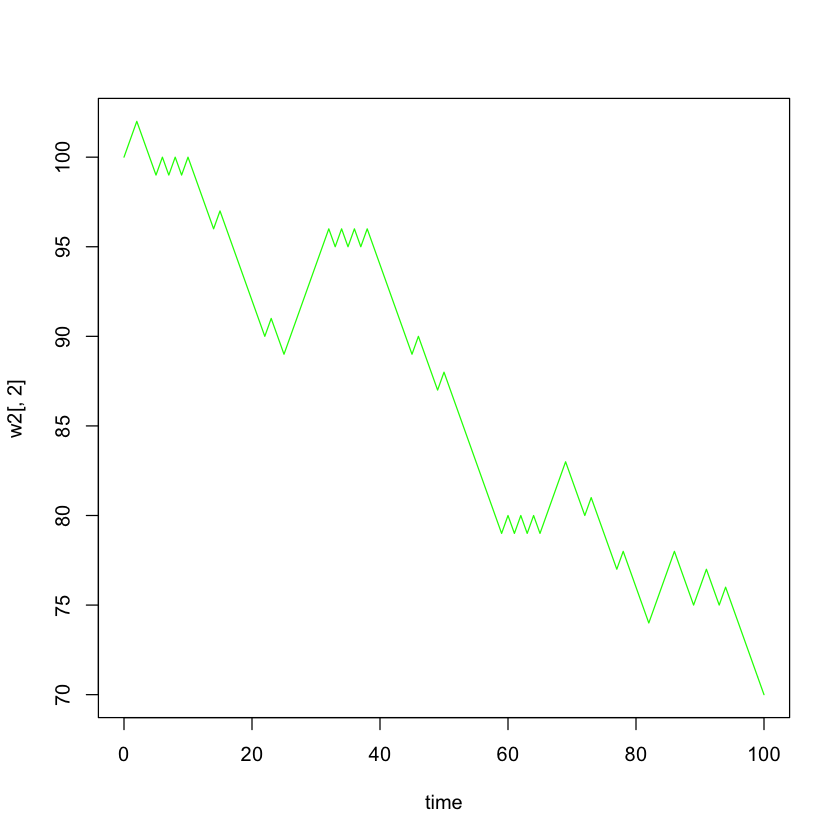

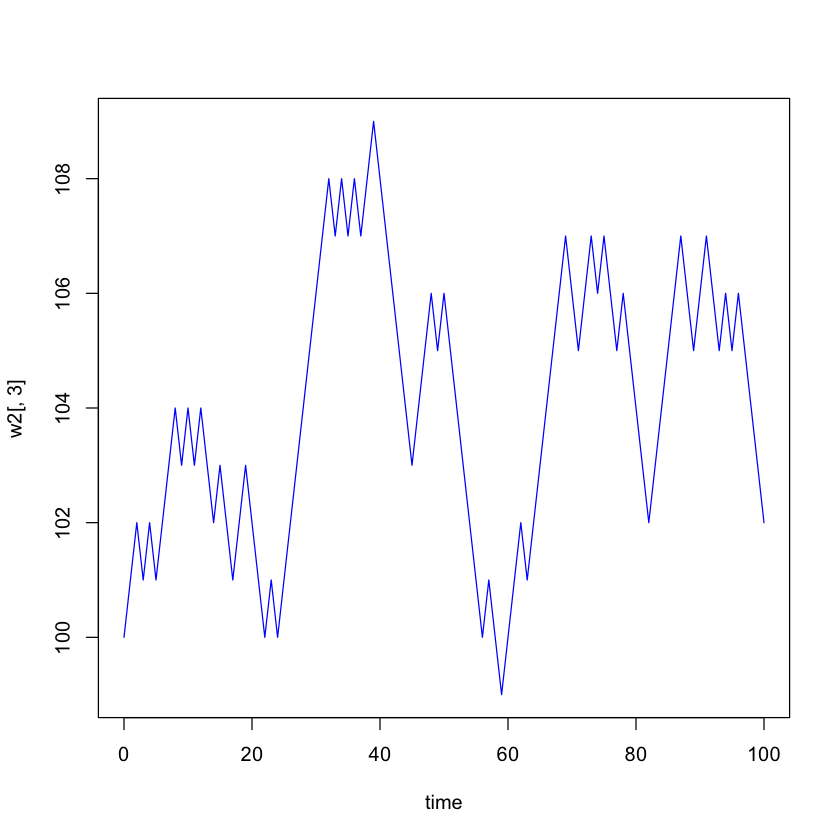

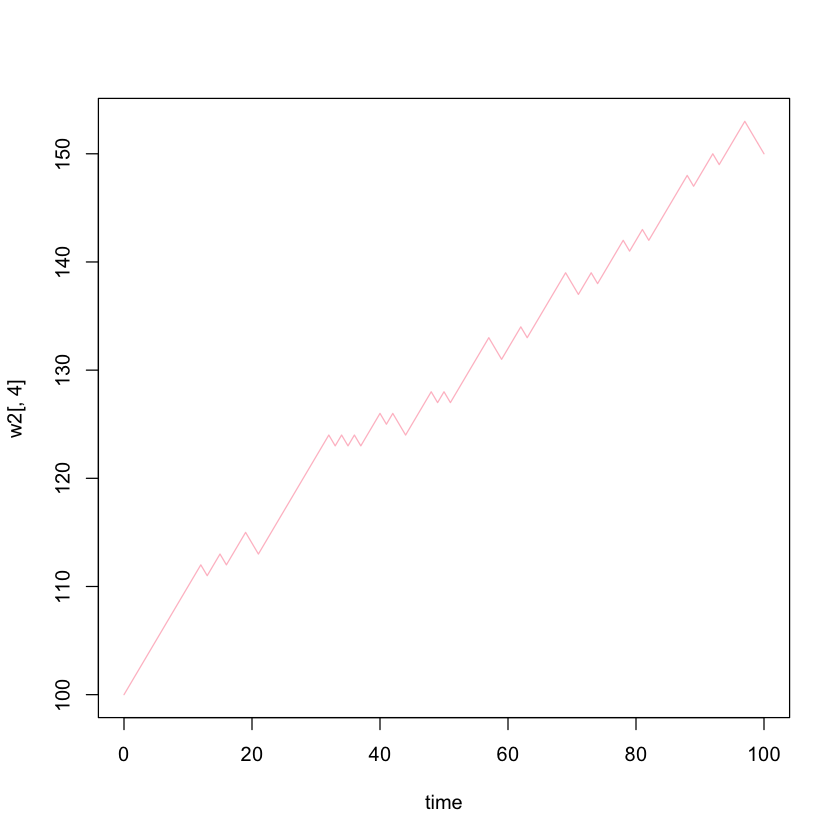

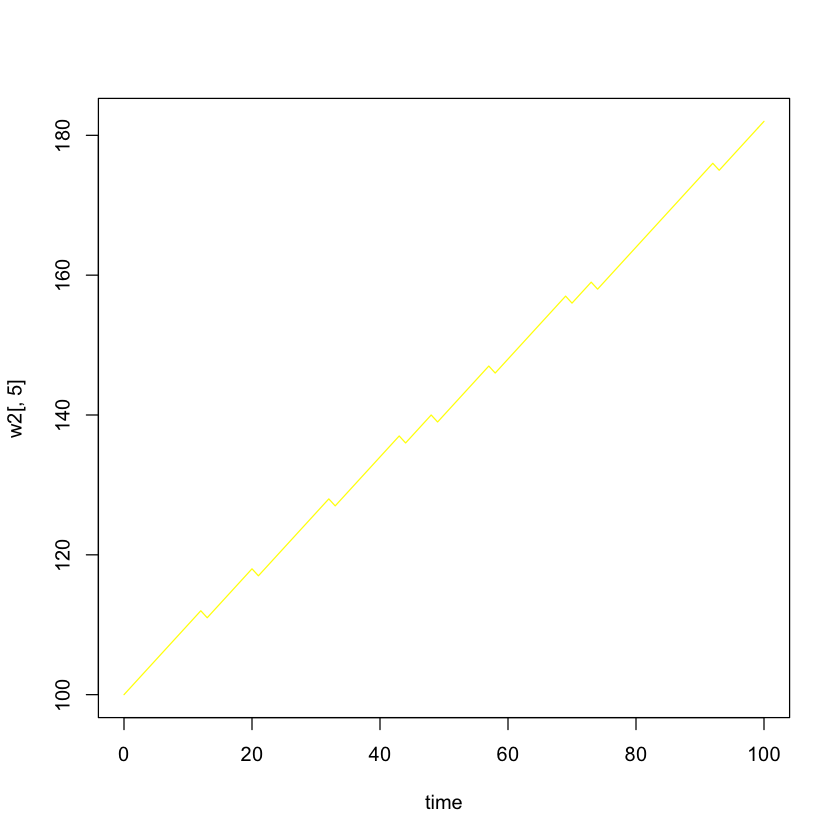

In [48]:
# 2. Loop over different values of p but keeping the same draw u 

w0 <- 100 #initial wealth
T <- 100 #final time period
N <- 5 #number of probabilities

#vector containing different win probabilities
p <- c(0.1,0.3,0.5,0.7,0.9)

#create empty objects to track wealth and wins
w2 <- rep(0, T + 1)
x2 <- rep(0, T)
w2 <- matrix(rep(w2,N), nrow=T+1, ncol=N) #record wealth - by T across rows & prob. across col.x
x2 <- matrix(rep(x2,N), nrow=T, ncol=N )

#fill initial wealth in matrix
for(n in 1:N){
  w2[1,n] <- w0   
}

#random draw
u <- runif(T,0,1)

for(n in 1:N){ #loop over five arbitrary win probabilities
    
    for(i in 1:T){
      if(u[i] <= 1-p[n]){
        x2[i] <- 0
        w2[i+1,n] <- w2[i,n] - 1
      } else {
        x2[i] <- 1
        w2[i+1,n] <- w2[i,n] + 1
      }
    }
}

time = 0:T
plot(time, w2[,1],type='l',col="red")
plot(time, w2[,2],type='l',col="green")
plot(time, w2[,3],type='l',col="blue")
plot(time, w2[,4],type='l',col="pink")
plot(time, w2[,5],type='l',col="yellow")

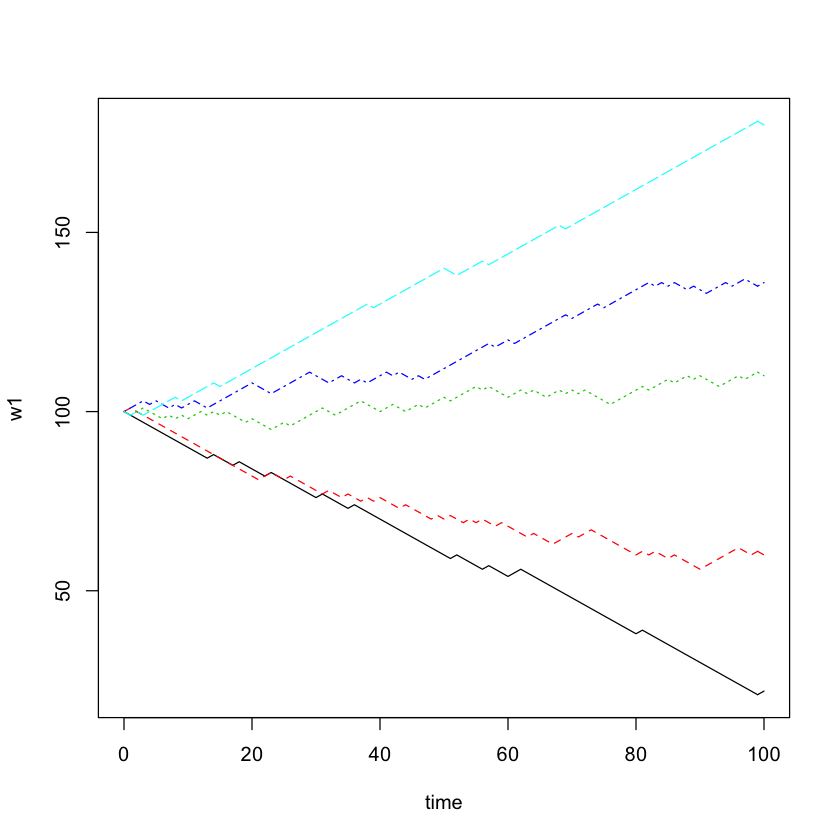

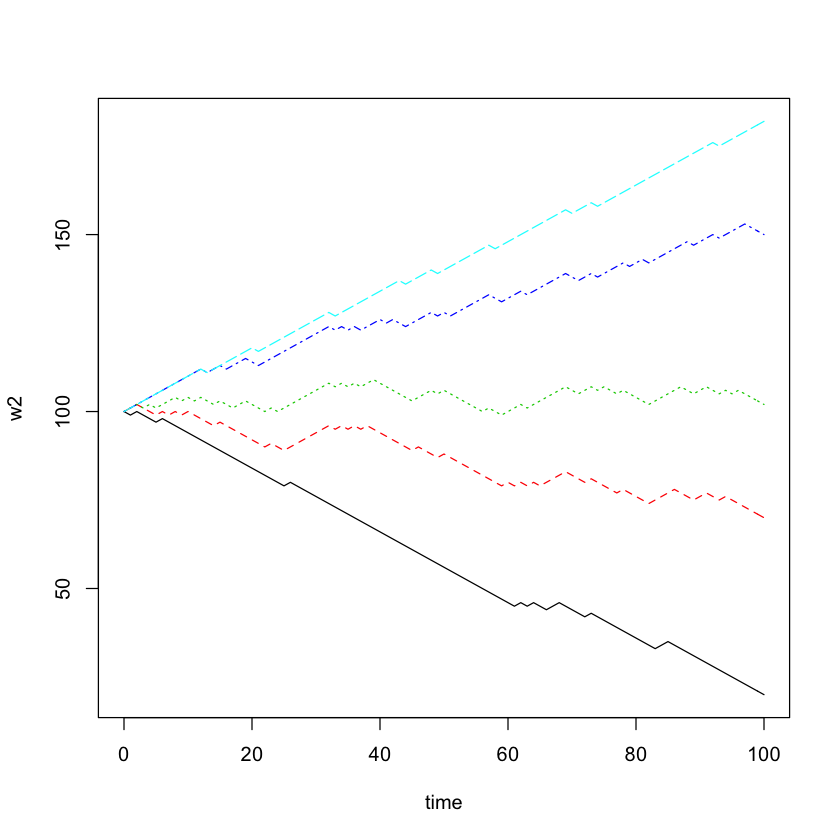

In [49]:
# 3. combine previous results in two graphs

matplot(time, w1, type='l') 
matplot(time, w2, type='l')

[1] "Average final wealth after 100 simulations: 99.02"

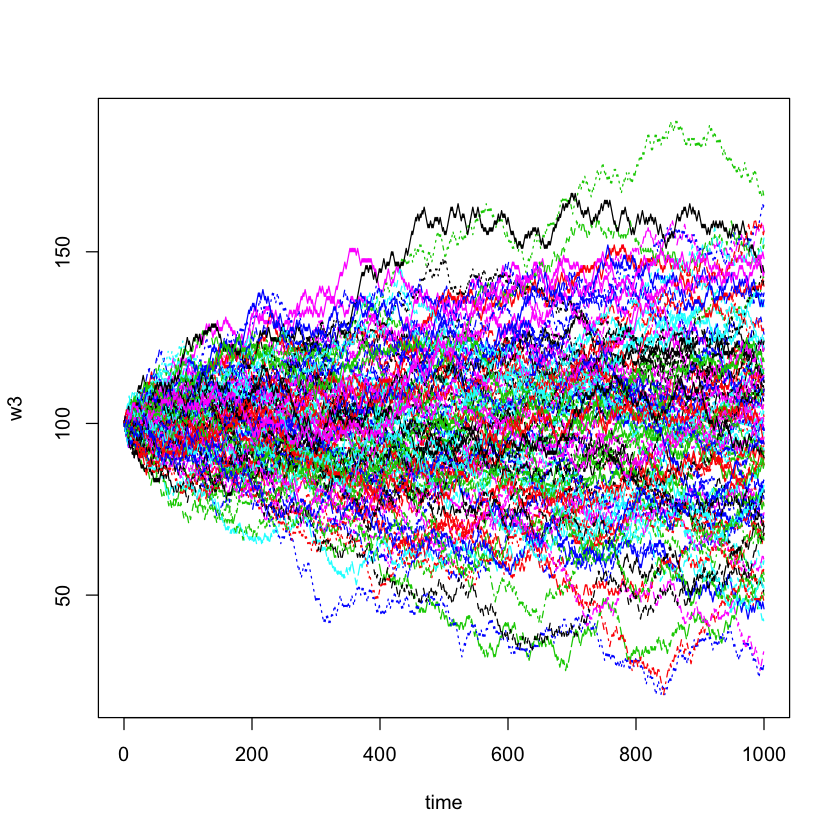

In [65]:
# 4. Run many simulations with single p
#    and return average final wealth

Y <- 100  #number of different simulations
w0 <- 100 #initial wealth
T <- 1000 #final time period
p <- 0.5

#create matrices recording wealth and wins
w3 <- rep(0, T + 1)
x3 <- rep(0, T)
w3 <- matrix(rep(w3,Y), nrow= T+1, ncol= Y)
x3 <- matrix(rep(x3,Y), nrow= T, ncol= Y)

#fill initial wealth in matrix
for(y in 1:Y){
  w3[1,y] <- w0   
}

for(y in 1:Y){ #repeats the simulation N times
    for(i in 1:T){
      #random draw
        u <- runif(1)
      if(u <= 1-p){
        x3[i] <- 0
        w3[i+1,y] <- w3[i,y] - 1
      } else {
        x3[i] <- 1
        w3[i+1,y] <- w3[i,y] + 1
      }
    }
}

#Average final wealth
w_fin_avg <- sum(w3[T+1,]) / Y
sprintf("Average final wealth after %s simulations: %s", Y, w_fin_avg)

#plot results
time = 0:T
matplot(time, w3,type='l')

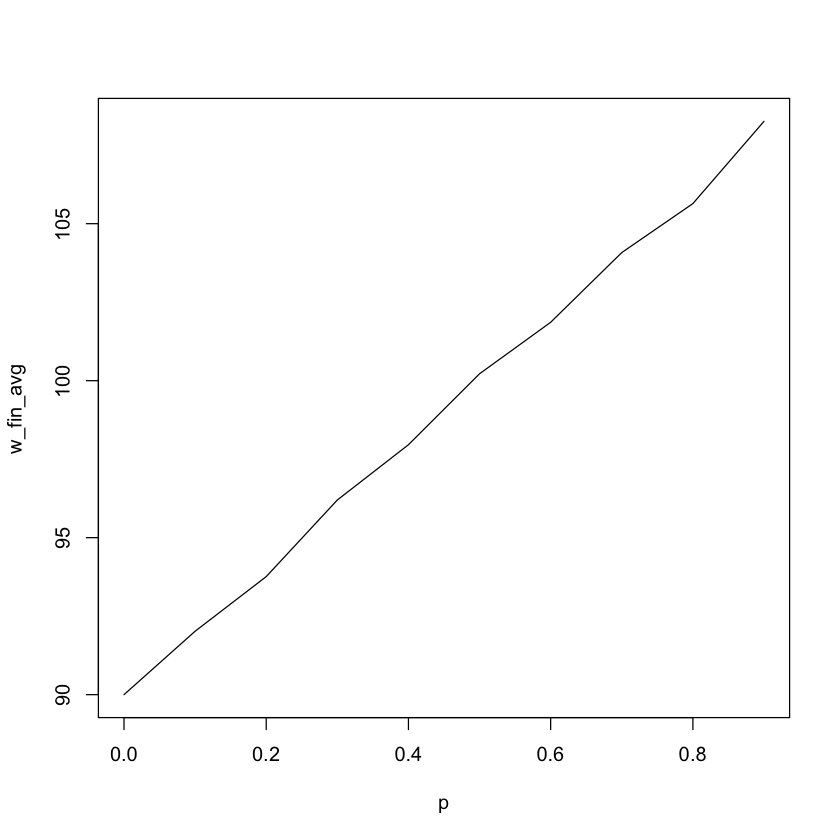

In [71]:
# 5. Combine both ideas to study 
#    average terminal wealth with respect to p

#Parameters
w0 <- 100 #initial wealth
Y <- 100  #number of different simulations
T <- 10 #final time period
N <- 10 #number of probabilities

#setup of different win probabilities
step <- 0.1
p <- rep(0, N)
for(i in 2:10){
   p[i] <- p[i - 1] + step
}

#create objects tracking wealth and average final wealth
w <- rep(0, T + 1)
x <- rep(0, T)
w <- matrix(rep(w,Y), nrow= T+1, ncol= Y)
x <- matrix(rep(x,Y), nrow= T, ncol= Y)
w_fin_avg <- rep(0,N)

#fill initial wealth in matrix
for(y in 1:Y){
  w[1,y] <- w0   
}

for(n in 1:N){ #loop over different probabilities
    for(y in 1:Y){ #repeats the simulation N times
        for(i in 1:T){
          #random draw
            u <- runif(1)
          if(u <= 1-p[n]){
            x[i] <- 0
            w[i+1,y] <- w[i,y] - 1
          } else {
            x[i] <- 1
            w[i+1,y] <- w[i,y] + 1
          }
        }
    }
 
    #Average final wealth given probability p
    w_fin_avg[n] <- sum(w[T+1,]) / Y
}


#plot results
matplot(p, w_fin_avg,type='l')